In [1]:
%load_ext autoreload
%cd /workdir/ComfyUI/
%autoreload 2
    
from comfywr.csd_lib import load_image, cn_preprocess, control_net_set_create, \
    control_net_set_apply_hint, init_extra_nodes, load_sd_checkpoint, load_cn, load_upscale_model, load_lora, \
    load_clip_vision, load_ipadapter, run_marigold_depth_estimation, image_scale, ultimate_sd_upscale, clip_encode, \
    ip_adapter_apply, load_depth_anything_v2, run_depth_anything_v2, image_scale_by

/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workdir/ComfyUI


/usr/local/lib/python3.11/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.11/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[custom_nodes.comfyui_controlnet_aux] | INFO -> Using ckpts path: /workdir/custom_nodes/comfyui_controlne

DWPose: Onnxruntime with acceleration providers detected


/workdir/custom_nodes/comfyui_marigold/nodes.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  empty_text_embed = torch.load(os.path.join(script_directory, "empty_text_em

In [2]:
import importlib
# Mesh = importlib.import_module('custom_nodes.ComfyUI-3D-Pack.mesh_processer.mesh').Mesh

In [12]:
mesh_path = '/workdir/ComfyUI/output/Unique3d_atlas/initial.obj'
# mesh = Mesh.load(mesh_path)

In [13]:
# import torch
# import numpy as np
import matplotlib.pyplot as plt 
# pt = mesh.convert_to_pointcloud()
# IMG_RES = 1024
# img = np.zeros((1024, 1024), dtype=np.float32)
# points = ((pt.points + 0.5) * (IMG_RES - 1)).astype(int)
# points.shape
# # points = points[:1000]
# views = []
# 
# xs, ys = points[:, [0, 1]].T
# v = img.copy()
# v[IMG_RES - 1 - ys, xs] = 1
# views.append(v)
# 
# zs, ys = points[:, [2, 1]].T
# v = img.copy()
# v[IMG_RES - 1 - ys, zs] = 1
# views.append(v)
# 
# plt.figure(figsize=(20,20))
# plt.imshow(np.concatenate(views, axis=1) * 255)
# plt.show()

In [14]:
!pip install "pyglet<2"


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


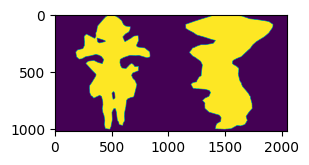

In [178]:
import numpy as np
from pathlib import Path
import trimesh
from PIL import Image, ImageDraw

from custom_nodes.comfywr_nodes.nodes import mesh_silhouette_images

vanilla_mesh = trimesh.load(Path(mesh_path).parent / 'initial_vanilla.obj')
vanilla_mesh_silh = mesh_silhouette_images(vanilla_mesh)
plt.figure(figsize=(3,3))
plt.imshow(np.concatenate(vanilla_mesh_silh, 1))
plt.show()

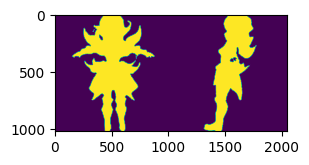

In [179]:
mesh = trimesh.load(mesh_path)
original_mesh_silh = mesh_silhouette_images(mesh)
plt.figure(figsize=(3,3))
plt.imshow(np.concatenate(original_mesh_silh, 1))
plt.show()

(1024, 1024)


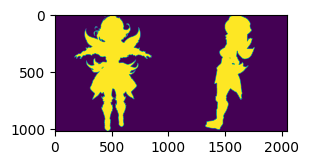

In [180]:
import cv2
target_silh = [
    cv2.imread('/workdir/ComfyUI/output/Unique3d_atlas/silhouette_00057_.png')[:, :, 0],
    cv2.imread('/workdir/ComfyUI/output/Unique3d_atlas/silhouette_00058_.png')[:, :, 0],
]
for i in range(2):
    target_silh[i] = cv2.resize(target_silh[i], (1024, 1024)) > 0
    
print(target_silh[0].shape)
plt.figure(figsize=(3,3))
plt.imshow(np.concatenate(target_silh, 1))
plt.show()

differential_evolution step 1: f(x)= 3424.339771270752
differential_evolution step 2: f(x)= 3424.339771270752
differential_evolution step 3: f(x)= 3424.339771270752
differential_evolution step 4: f(x)= 3424.339771270752
differential_evolution step 5: f(x)= 3424.339771270752
differential_evolution step 6: f(x)= 3424.339771270752
differential_evolution step 7: f(x)= 3424.339771270752
differential_evolution step 8: f(x)= 3424.339771270752
differential_evolution step 9: f(x)= 3424.339771270752
differential_evolution step 10: f(x)= 3424.339771270752
differential_evolution step 11: f(x)= 3424.339771270752
differential_evolution step 12: f(x)= 3424.339771270752
differential_evolution step 13: f(x)= 3424.339771270752
differential_evolution step 14: f(x)= 3424.339771270752
differential_evolution step 15: f(x)= 2219.359004020691
differential_evolution step 16: f(x)= 2219.359004020691
differential_evolution step 17: f(x)= 2219.359004020691
differential_evolution step 18: f(x)= 2219.359004020691
d

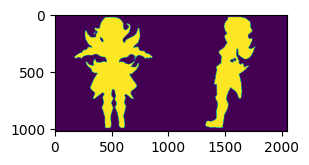

In [181]:
from custom_nodes.comfywr_nodes.nodes import align_images
aligned1, params1 = align_images(original_mesh_silh[0].astype(np.uint8) * 255,
                                target_silh[0].astype(np.uint8) * 255, [1, 0, 0])
aligned2, params2 = align_images(original_mesh_silh[1].astype(np.uint8) * 255,
                                target_silh[1].astype(np.uint8) * 255, [1, 0, 0])
print(params1.x, params2.x)
plt.figure(figsize=(3,3))
aligned_silh = [aligned1 > 0, aligned2 > 0]
plt.imshow(np.concatenate(aligned_silh, 1))
plt.show()

In [193]:
# scale = (params1.x[0] + params2.x[0]) / 2
scale = params1.x[0]
offset_x = params1.x[1] * 2
# offset_y = (params1.x[2] + params2.x[2]) / 2
offset_y = -params1.x[2] * 2
offset_z = -params2.x[1] * 2

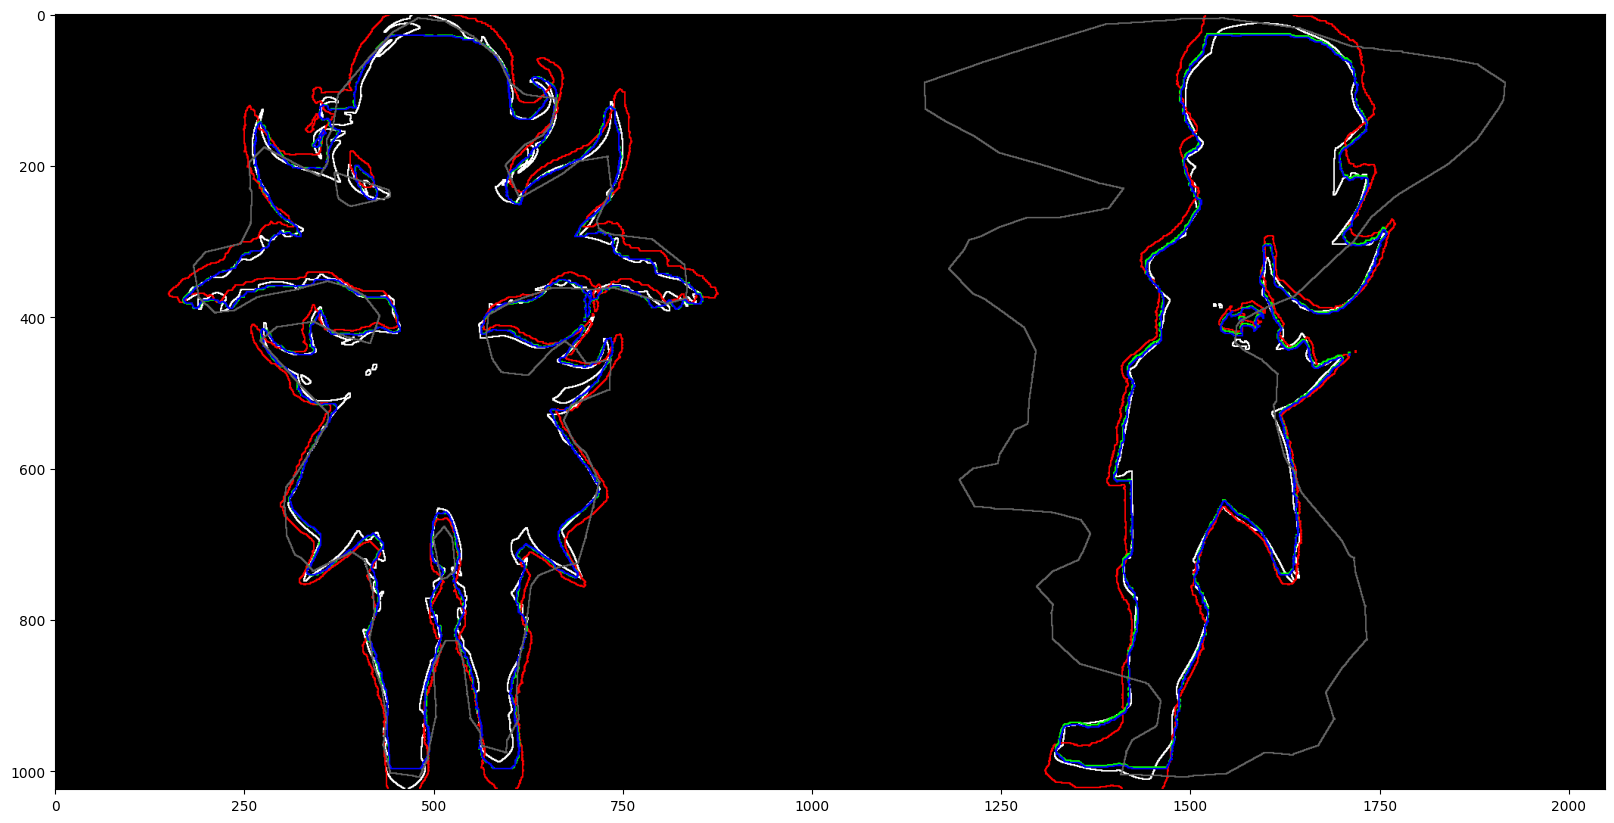

In [194]:
from custom_nodes.comfywr_nodes.nodes import transform_mesh
import trimesh
aligned_mesh = trimesh.load(mesh_path)
# aligned_mesh = transform_mesh(aligned_mesh.copy(), offset_x, offset_y, offset_z, *[scale] * 3)
# aligned_mesh = transform_mesh(aligned_mesh.copy(), offset_x * coef, -offset_y * coef, 0, *[scale] * 3)
# aligned_mesh = transform_mesh(aligned_mesh.copy(), offset_x, -offset_y * 0, 0, *[scale] * 3)
aligned_mesh = transform_mesh(aligned_mesh.copy(), offset_x, offset_y, offset_z, *[scale] * 3)
# aligned_mesh = transform_mesh(aligned_mesh, 0, 0, 0, *[scale] * 3)
# aligned_mesh = transform_mesh(aligned_mesh, 0, 0, 0, *[1] * 3)
aligned_mesh_slih = mesh_silhouette_images(aligned_mesh)

from custom_nodes.comfywr_nodes.nodes import visualize_silhouettes
vis = visualize_silhouettes([target_silh, original_mesh_silh, aligned_silh, aligned_mesh_slih, vanilla_mesh_silh])
plt.figure(figsize=(20,20))
plt.imshow(vis)
plt.show()